(vis-ieee8yrs)=
# Visualisierung der Daten von IEEE

- [x] Titel sollte zu Dateinamen passen

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import os.path
import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.3
datetime <module 'datetime' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\datetime.py'>
seaborn 0.11.2
plotly 5.4.0
sys 3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]
os <module 'os' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\os.py'>
platform 1.0.8
Image 8.3.1
requests 2.26.0
scipy 1.7.1


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    #pd.set_option('display.latex.repr', True)
    #pd.set_option('display.latex.longtable', True)
    #plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

- [x] Lizenz der Daten überprüfen und hier nennen inkl. dem Lizenzhinweis und ggf. Literaturquelle und Link

## Darstellung der Daten

Die Daten stammen von {cite:p}`dfvb-re49-21` (DOI: [10.21227/dfvb-re49](https://dx.doi.org/10.21227/dfvb-re49)) und unterliegen einer [Creative Commons Attribution Lizenz](https://creativecommons.org/licenses/by/4.0/).

Im Folgenden sind sowohl die Heizlast [kW] sowie die elektrische Last [kW] von Haushalten dargestellt. Die gemessenen Daten umfassen einen Zeitraum von acht Jahren.
- [x] Text sollte eindeutig verständlich

- [x] Datensatz nur, wenn Lizenz das zulässt, sonst nur verlinken, wo man den bekommt und sonst nichts weiter tun
- [ ] falls Datensatz runterladebar, am besten original-Dateinamen verwenden und if then else (wenn schon runtergeladen, dann nicht nochmal laden)
- [x] Datensatz kommentieren

__als Zeitreihe:__

In [3]:
ieee8yrData = pd.read_csv('../../data/Load_data_new.csv')
ieee8yrData['Time'] = pd.to_datetime(ieee8yrData['Time'])
ieee8yrData.set_index('Time', inplace=True)
ieee8yrData.rename(columns={col: col.replace('_', ' ') for col in ieee8yrData.columns}, inplace=True)

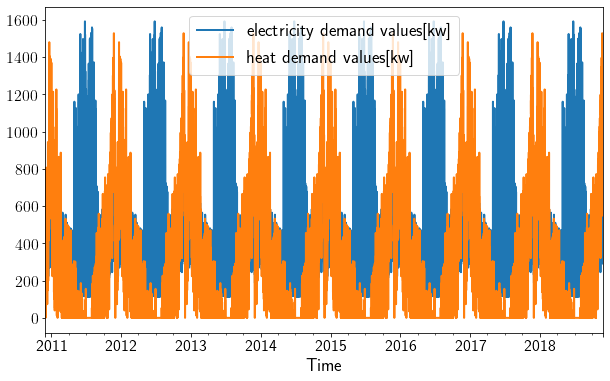

In [8]:
ieee8yrData.loc[:,['electricity demand values[kw]',
       'heat demand values[kw]']].plot();

Es fällt hier auf, dass die Daten sich jedes Jahr exakt zu wiederholen scheinen. Das erscheint unrealistisch.

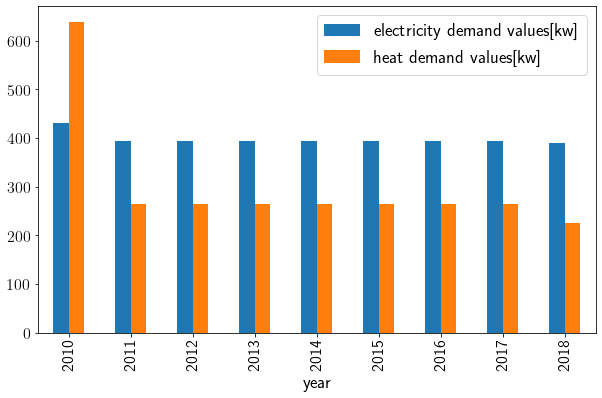

In [16]:
ieee8yrData['year'] = ieee8yrData.index.year

ieee8yrData_yearly = ieee8yrData.groupby(by='year').mean()
ieee8yrData_yearly.loc[:, ['electricity demand values[kw]',
       'heat demand values[kw]']].plot(kind='bar');

Fast jedes Jahr dasselbe (die Abweichung beim ersten Jahr 2010 kann dadurch begründet werden, dass von diesem Jahr nur die letzten Tage mit enthalten sind), das erscheint etwas "zu perfekt". Hier müssen die Daten hinterfragt werden.

__als Dauerlinie:__

In [5]:
ieee8yrData_sort_el = ieee8yrData.loc['2012', ['electricity demand values[kw]']].sort_values(by='electricity demand values[kw]', ascending=False,
                                             ignore_index=True)
ieee8yrData_sort_th = ieee8yrData.loc['2012', ['heat demand values[kw]']].sort_values(by='heat demand values[kw]', ascending=False,
                                             ignore_index=True)


In [6]:
ieee8yrData_sort = pd.concat([ieee8yrData_sort_el, ieee8yrData_sort_th], axis=1, ignore_index=True)
ieee8yrData_sort.columns = ['electricity demand values[kw]', 'heat demand values[kw]']

<AxesSubplot:>

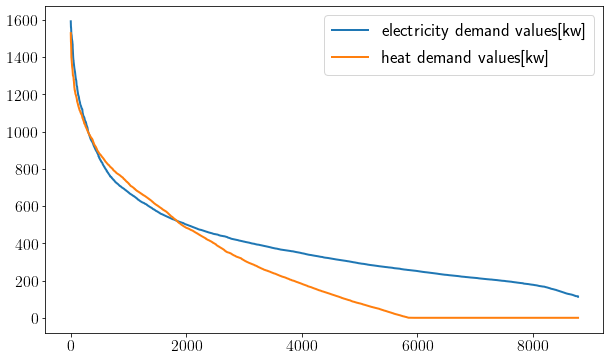

In [7]:
ieee8yrData_sort.plot()

```{bibliography}
:filter: docname in docnames
```